In [137]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

golden_ratio=(1.+np.sqrt(5))/2.
ysize=3.5 #inches
plt.rcParams['figure.figsize']=(ysize * golden_ratio, ysize)
#from matplotlib import rc
#rc('font',**{'family':'sans','serif':['Times New Roman']})
#rc('text', usetex=True)
plt.rcParams["font.family"] = "Times New Roman"


In [138]:
binstep=0.1

# read output from read_zlim_vs_theta.py
#dbtheta=pd.read_csv('thetabin_zbin01.log')
dbtheta=pd.read_csv('thetabin_zbin01.log')
#dbtheta=pd.read_csv('thetabin_zbin002.log')

thetaview=dbtheta['theta']
zview=dbtheta['z']


# read output from BNS simulations by Jan Delta_z=0.3

dbeff5deg=pd.read_csv('Efficiency_BNS_SNR8.0_deg5_z.txt',header=None,sep=' ')
Pbns_ET2CE5deg_03=dbeff5deg[1]
Pbns_ETCE5deg_03=dbeff5deg[2]
Pbns_ET5deg_03=dbeff5deg[3]

dbeff10deg=pd.read_csv('Efficiency_BNS_SNR8.0_deg10_z.txt',header=None,sep=' ')
zeff=dbeff10deg[0].values
Pbns_ET2CE10deg_03=dbeff10deg[1]
Pbns_ETCE10deg_03=dbeff10deg[2]
Pbns_ET10deg_03=dbeff10deg[3]

dbeff=pd.read_csv('Efficiency_BNS_SNR8.0_z.txt',header=None,sep=' ')
Pbns_ET2CE_all_03=dbeff[1]
Pbns_ETCE_all_03=dbeff[2]
Pbns_ET_all_03=dbeff[3]

Pbns_ET2CE_03=[]
Pbns_ETCE_03=[]
Pbns_ET_03=[]
for i in range(0,len(zeff)):
    if zeff[i]<0.3:
        Pbns_ET2CE_03.append(Pbns_ET2CE_all_03[i])
        Pbns_ETCE_03.append(Pbns_ETCE_all_03[i])
        Pbns_ET_03.append(Pbns_ET_all_03[i])
    if zeff[i]>=0.3:
        Pbns_ET2CE_03.append(Pbns_ET2CE10deg_03[i])
        Pbns_ETCE_03.append(Pbns_ETCE10deg_03[i])
        Pbns_ET_03.append(Pbns_ET10deg_03[i])
        

In [139]:
# read output from MOS (i.e. the redshift of simulated short GRBs)
dfx=pd.read_csv('shortGRBsDetectedBySXIXGIS.txt',header=None)
zx=dfx[0]


# define z grid
zmax=20

l=int((zmax-0)/binstep)

bins=[]
for i in range(0,l):
    bins.append(round(binstep*i,1))
    #bins.append(round(binstep*i,2))

In [140]:
#fig = plt.figure()

hist_x_density=np.histogram(zx,bins=bins,density=True)

#hist_x_density=plt.hist(zx,bins=bins,density=True,alpha=0)
hist_x_number=np.histogram(zx,bins=bins)


In [141]:
# distribuzione delle simulazioni (400)
#Fx=hist_x_density[0]
Nx0=hist_x_number[0]
zbinx=hist_x_density[1]


In [142]:
# deg up to which a grb at zbin can be detected offaxis
thetajet=4.0
theta=np.asarray(Nx0)*0+thetajet

#for i in range(0,32):
for i in range(0,17):
#for i in range(0,90):
    theta[i]=thetaview[i]

thetaoffaxisvsz=theta*np.pi/180
thetonaxis=thetajet*np.pi/180
increasefact=(1-np.cos(thetaoffaxisvsz))/(1-np.cos(thetonaxis))



In [143]:
Fx0=Nx0/sum(Nx0)
Nx=Nx0*increasefact
Fx=Nx/sum(Nx)


# efficienza di detection in bin di ampiezza 0.02
#Pbns_ETCE=np.repeat(Pbns_ETCE_03,15)
#Pbns_ET=np.repeat(Pbns_ET_03,15)

# efficienza di detection in bin di ampiezza 0.1
Pbns_ET2CE=np.repeat(Pbns_ET2CE_03,3)
Pbns_ETCE=np.repeat(Pbns_ETCE_03,3)
Pbns_ET=np.repeat(Pbns_ET_03,3)

# efficienza di detection in bin di ampiezza 0.05 (ogni valore della prob. è ripetuto 3 volte)
#Pbns_ETCE=(np.asarray([0.115,0.115,0.115,0.115,0.115,0.115,0.125,0.125,0.125,0.125,0.125,0.125,0.118,0.118,0.118,0.118,0.118,0.118,0.08,0.08,0.08,0.08,0.08,0.08,0.055,0.055,0.055,0.055,0.055,0.055,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])/0.125)
#Pbns_ET=(np.asarray([0.115,0.115,0.115,0.115,0.115,0.115,0.12,0.12,0.12,0.12,0.12,0.12,0.07,0.07,0.07,0.07,0.07,0.07,0.025,0.025,0.025,0.025,0.025,0.025,0.021,0.021,0.021,0.021,0.021,0.021,0.005,0.005,0.005,0.005,0.005,0.005,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])/0.125)



# percentuale vista anche con GW
#P_TH_ETCE=PGRBinz_x*Pbns_ETCE
#P_TH_ET=PGRBinz_x*Pbns_ET
leff=len(Pbns_ET)
P_TH_ET2CE=Fx[0:leff]*Pbns_ET2CE
P_TH_ETCE=Fx[0:leff]*Pbns_ETCE
P_TH_ET=Fx[0:leff]*Pbns_ET
#P_TH_ETCE=Fx[0:150]*Pbns_ETCE
#P_TH_ET=Fx[0:150]*Pbns_ET

<IPython.core.display.Javascript object>


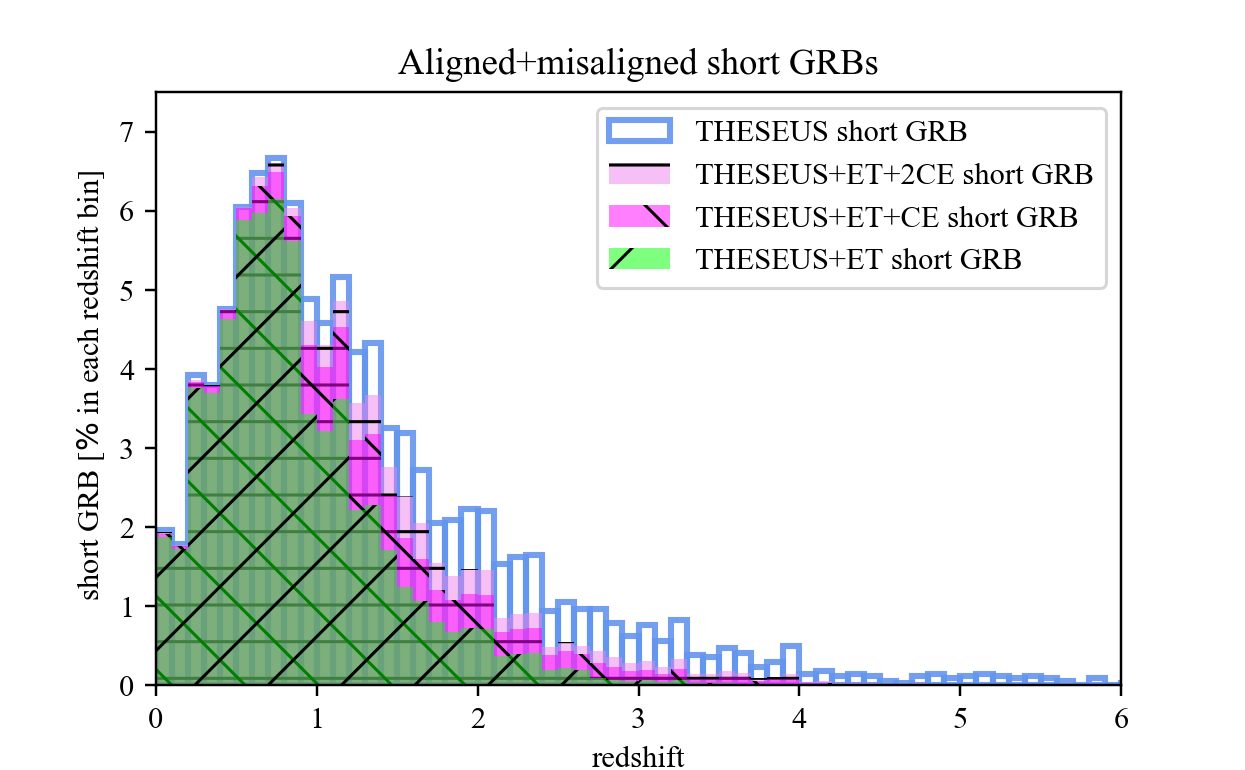

In [145]:
plt.figure()
plt.bar(zbinx[0:-1],100*Fx,width=binstep,align='edge',log=False,linewidth=2,color="None",edgecolor='cornflowerblue',alpha=0.9,label='THESEUS short GRB')

plt.bar(zbinx[0:leff],100*P_TH_ET2CE,width=binstep,log=False,align='edge',hatch='-',color='violet',alpha=0.5,label='THESEUS+ET+2CE short GRB')
plt.bar(zbinx[0:leff],100*P_TH_ETCE,width=binstep,log=False,align='edge',hatch='\\',color='magenta',alpha=0.5,label='THESEUS+ET+CE short GRB')
plt.bar(zbinx[0:leff],100*P_TH_ET,width=binstep,log=False,align='edge',hatch='/',color='lime',alpha=0.5,label='THESEUS+ET short GRB')
#plt.bar(zbinx[0:150],100*P_TH_ETCE,width=binstep,log=False,align='edge',hatch='\\',color='magenta',alpha=0.5,label='THESEUS+ET+CE on+off axis short GRB')
#plt.bar(zbinx[0:150],100*P_TH_ET,width=binstep,log=False,align='edge',hatch='/',color='lime',alpha=0.5,label='THESEUS+ET on+offaxis short GRB')
#plt.bar((x1+x2)/2.,P_TH_offaxis_ET,width=(x2-x1),align='center',linewidth=5,alpha=0.2,edgecolor='green',label='THESEUS+ET short GRB including off-axis ')
#plt.bar((x1+x2)/2.,P_TH_offaxis_ETCE,width=(x2-x1),align='center',linewidth=5,alpha=0.3,edgecolor='magenta',label='THESEUS+ET+CE short GRB including off-axis ')
#plt.xlim(0.,13)
plt.xlim(0.,6)
plt.ylim(0,7.5)
plt.title('Aligned+misaligned short GRBs')
plt.xlabel('redshift')
plt.ylabel(' short GRB [$\%$ in each redshift bin]')

#plt.legend(fontsize='small')
plt.legend()


#plt.savefig('SGRB_hist_ET_CE_offaxis_bin01.pdf')
plt.savefig('SGRB_hist_ET_CE_offaxis_bin01.png',dpi=600, bbox_inches = "tight")
#plt.savefig('SGRB_hist_ET_2CE_offaxis_bin01.tif',dpi=600, bbox_inches = "tight")





In [146]:

k=sum(Nx)/sum(Nx0)

print('Independently on GW det. efficiency, the total number of on- and off-axis GBR is ',k,' times larger than on-axis only GRBs (i.e. 12/yr on-axis and ',12*k,'/yr on- and off-axis)')
print('')

print('The fraction of on- + off-axis SGRB detected with GW interferometers are:')
print('THESEUS+ET:',100*sum(P_TH_ET),'%')
print('THESEUS+ET+CE:',100*sum(P_TH_ETCE),'%')
print('THESEUS+ET+2CE:',100*sum(P_TH_ET2CE),'%')

print('')
print('Total GRB THESEUS (on+off axis) in 1(3.45)yr:', 12*k,'(',12*k*3.45,')')
print('Total GRB THESEUS+ET (on+off axis) in 1(3.45)yr:', 12*k*sum(P_TH_ET),'(',12*k*3.45*sum(P_TH_ET),')')
print('Total GRB THESEUS+ET+CE (on+off axis) in 1(3.45)yr:', 12*k*sum(P_TH_ETCE),'(',12*k*3.45*sum(P_TH_ETCE),')')
print('Total GRB THESEUS+ET+2CE (on+off axis) in 1(3.45)yr:', 12*k*sum(P_TH_ET2CE),'(',12*k*3.45*sum(P_TH_ET2CE),')')

#up to z=3.0
#k03=sum(Nx[0:10])/sum(Nx0[0:10])
# GRB with ET too


# only if bin <=0.1
print('')

#print('Total GRB THESEUS+2G (at z<0.1) in 3.45 yr: ',40*k*Fx[0])
#print('Total GRB THESEUS+2G (at z<0.08) in 3.45 yr: ',sum(40*k*Fx[0:4]))
#print('Total GRB THESEUS+2G (at z<0.06) in 3.45 yr: ',sum(40*k*Fx[0:3]))

Independently on GW det. efficiency, the total number of on- and off-axis GBR is  1.7721801888225415  times larger than on-axis only GRBs (i.e. 12/yr on-axis and  21.2661622658705 /yr on- and off-axis)

The fraction of on- + off-axis SGRB detected with GW interferometers are:
THESEUS+ET: 63.2836818400846 %
THESEUS+ET+CE: 75.66090873833811 %
THESEUS+ET+2CE: 82.84039313203255 %

Total GRB THESEUS (on+off axis) in 1(3.45)yr: 21.2661622658705 ( 73.36825981725322 )
Total GRB THESEUS+ET (on+off axis) in 1(3.45)yr: 13.458010467929611 ( 46.430136114357154 )
Total GRB THESEUS+ET+CE (on+off axis) in 1(3.45)yr: 16.090171624127173 ( 55.511092103238745 )
Total GRB THESEUS+ET+2CE (on+off axis) in 1(3.45)yr: 17.61697242514308 ( 60.778554866743626 )



In [147]:

# ---- PLOT ON-AXIS SGRB DISTRIBUTION ------

dfr=pd.read_csv('shortGRBsDetectedByIRT.txt',header=None)
#dfx=pd.read_csv('shortGRBsDetectedBySXIXGIS.txt',header=None)
zr=dfr[0]
#zx=dfx[0]

#zmax=20

#l=int((zmax-0)/binstep)

#bins=[]
#for i in range(0,l):
#    bins.append(round(binstep*i,1))
    #bins.append(round(binstep*i,2))

#hist_x_density=plt.hist(zx,bins=bins,density=True,color='blue',linewidth=5,histtype='step',alpha=0)
#hist_x_density=np.histogram(zx,bins=bins,density=True)

#hist_x_density=plt.hist(zx,bins=bins,density=True,alpha=0)
#hist_x_number=np.histogram(zx,bins=bins)
# distribuzione delle simulazioni (400)
#Fx=hist_x_density[0]
#zbinx=hist_x_density[1]
#Nx=hist_x_number[0]
#Fx=Nx/sum(Nx)     # Fx con stepbin =1 riproduce le percentuali del MOS quindi ok

# con plt.hist credo si deve moltiplicare per stebin ogni bin (con 1 viene automatico ma con 0.3 no)

# percentuale di casi per ciascun zbin fino a z=3

#PGRBinz_x=Fx[0:10]

hist_r_density=np.histogram(zr,bins=bins,density=True)
hist_r_number=np.histogram(zr,bins=bins)
# distribuzione delle simulazioni (400)
# percentuale di casi per ciascun zbin
#Fr=hist_r_density[0]
zbin_r=hist_r_density[1]
Nr=hist_r_number[0]
Fr=Nr/sum(Nr)

frac=len(zr)/len(zx)


# efficienza di detection in bin di ampiezza 0.02
#Pbns_ET2CE=np.repeat(Pbns_ET2CE_03,15)
#Pbns_ETCE=np.repeat(Pbns_ETCE_03,15)
#Pbns_ET=np.repeat(Pbns_ET_03,15)

# efficienza di detection in bin di ampiezza 0.1
Pbns_ET2CE5deg=np.repeat(Pbns_ET2CE5deg_03,3)
Pbns_ETCE5deg=np.repeat(Pbns_ETCE5deg_03,3)
Pbns_ET5deg=np.repeat(Pbns_ET5deg_03,3)


#x1=x1[0:6]
#x2=x2[0:6]

# percentuale vista anche con GW
#P_TH_ETCE=PGRBinz_x*Pbns_ETCE
#P_TH_ET=PGRBinz_x*Pbns_ET
P_TH_ET2CE5deg=Fx0[0:leff]*Pbns_ET2CE5deg
P_TH_ETCE5deg=Fx0[0:leff]*Pbns_ETCE5deg
P_TH_ET5deg=Fx0[0:leff]*Pbns_ET5deg
#P_TH_ETCE=Fx[0:150]*Pbns_ETCE
#P_TH_ET=Fx[0:150]*Pbns_ET
#P_TH_ETCE=Pbns_ETCE
#P_TH_ET=Pbns_ET



<IPython.core.display.Javascript object>


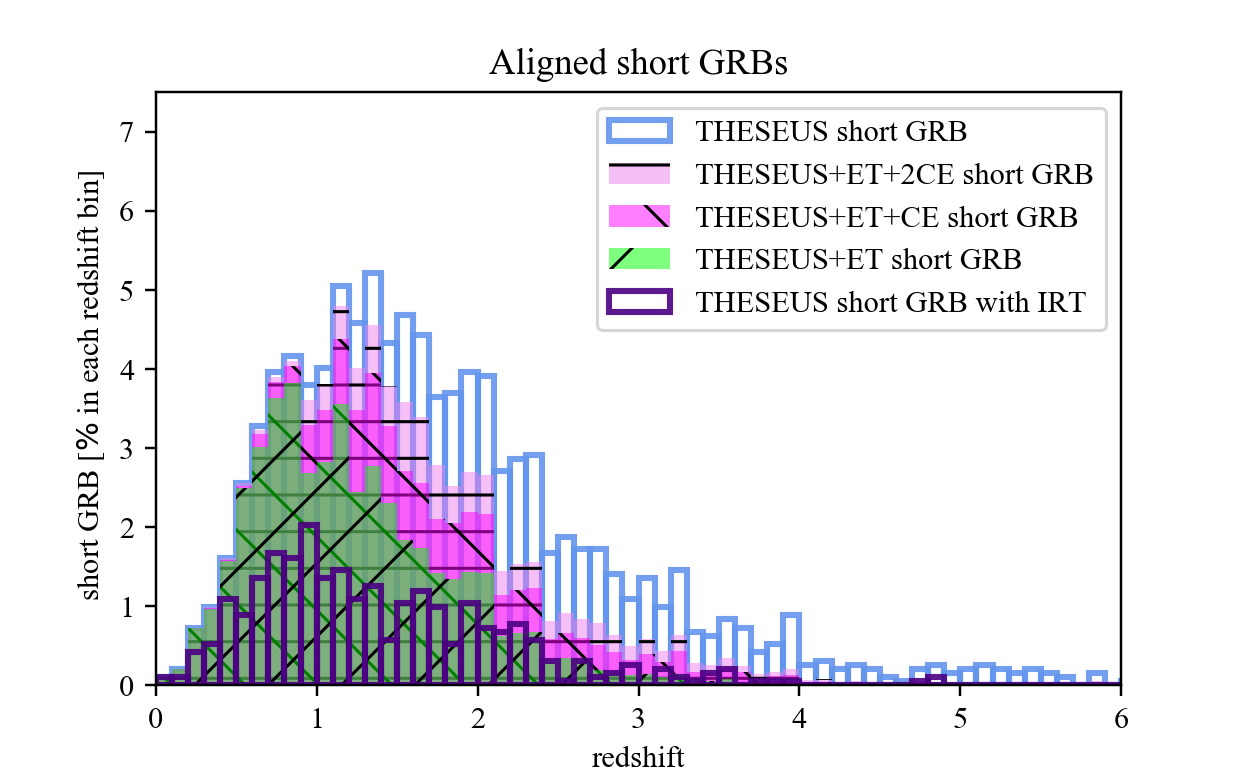

In [148]:
plt.figure()
# plot histogram
#plt.bar((x1+x2)/2,Pbns_ETCE,align='center',width=(x2-x1),label='THESEUS+ET+CE') # A bar chart
#plt.hist(zr,bins=bins,density=True,color='red',linewidth=8,histtype='step',alpha=0.7,label='THESEUS short GRB with IRT detection')

#plt.bar(zbinx[0:10],100*PGRBinz_x,width=binstep,align='edge',log=False,linewidth=4,color="None",edgecolor='blue',alpha=0.9,label='THESEUS short GRB')
#plt.bar(zbin_r[0:10],100*PGRBinz_xr,width=binstep,align='edge',log=False,linewidth=4,color="None",edgecolor='red',alpha=0.9,label='THESEUS short GRB with IRT')
plt.bar(zbinx[0:-1],100*Fx0,width=binstep,align='edge',log=False,linewidth=2,color="None",edgecolor='cornflowerblue',alpha=0.9,label='THESEUS short GRB')


#plt.bar((x1+x2)/2.,100*P_TH_ETCE,width=(x2-x1),log=False,align='center',hatch='\\',color='magenta',alpha=0.5,label='THESEUS+ET+CE short GRB')
#plt.bar((x1+x2)/2.,100*P_TH_ET,width=(x2-x1),log=False,align='center',hatch='/',color='lime',alpha=0.5,label='THESEUS+ET short GRB')
#plt.bar(zbinx[0:10],100*P_TH_ETCE,width=(x2-x1),log=False,align='edge',hatch='\\',color='magenta',alpha=0.5,label='THESEUS+ET+CE short GRB')
#plt.bar(zbinx[0:10],100*P_TH_ET,width=(x2-x1),log=False,align='edge',hatch='/',color='lime',alpha=0.5,label='THESEUS+ET short GRB')
plt.bar(zbinx[0:leff],100*P_TH_ET2CE5deg,width=binstep,log=False,align='edge',hatch='-',color='violet',alpha=0.5,label='THESEUS+ET+2CE short GRB')
plt.bar(zbinx[0:leff],100*P_TH_ETCE5deg,width=binstep,log=False,align='edge',hatch='\\',color='magenta',alpha=0.5,label='THESEUS+ET+CE short GRB')
plt.bar(zbinx[0:leff],100*P_TH_ET5deg,width=binstep,log=False,align='edge',hatch='/',color='lime',alpha=0.5,label='THESEUS+ET short GRB')
#plt.bar(zbinx[0:150],100*P_TH_ETCE,width=binstep,log=False,align='edge',hatch='\\',color='magenta',alpha=0.5,label='THESEUS+ET+CE short GRB')
#plt.bar(zbinx[0:150],100*P_TH_ET,width=binstep,log=False,align='edge',hatch='/',color='lime',alpha=0.5,label='THESEUS+ET short GRB')
plt.bar(zbin_r[0:-1],100*Fr*frac,width=binstep,align='edge',log=False,linewidth=2,color="None",edgecolor='indigo',alpha=0.9,label='THESEUS short GRB with IRT')

#plt.xlim(0.,13)
plt.xlim(0.,6)
plt.ylim(0,7.5)
plt.title('Aligned short GRBs')
plt.xlabel('redshift')
plt.ylabel(' short GRB [$\%$ in each redshift bin]')

#plt.legend(fontsize='small')
plt.legend()

#plt.savefig('SGRB_hist_ET_CE_onaxis_bin01.pdf')
plt.savefig('SGRB_hist_ET_CE_onaxis_bin01.png',dpi=600, bbox_inches = "tight")
#plt.savefig('SGRB_hist_ET_2CE_onaxis_bin01.tif',dpi=600, bbox_inches = "tight")



In [149]:
print('--- ON-AXIS SHORT GRBs ---')

onaxisGRBperyear=Fx0*12

print('')
print('THESEUS+ET:',100*sum(P_TH_ET5deg),'%')
print('THESEUS+ET+CE:',100*sum(P_TH_ETCE5deg),'%')
print('THESEUS+ET+2CE:',100*sum(P_TH_ET2CE5deg),'%')
print('')

print('Total GRB THESEUS (on axis) in 1(3.45)yr:', 12,'(',12*3.45,')')
print('Total GRB THESEUS+ET (on axis) in 1(3.45)yr:', 12*sum(P_TH_ET5deg),'(',12*3.45*sum(P_TH_ET5deg),')')
print('Total GRB THESEUS+ET+CE (on axis) in 1(3.45)yr:', 12*sum(P_TH_ETCE5deg),'(',12*3.45*sum(P_TH_ETCE5deg),')')
print('Total GRB THESEUS+ET+2CE (on axis) in 1(3.45)yr:', 12*sum(P_TH_ET2CE5deg),'(',12*3.45*sum(P_TH_ET2CE5deg),')')

# only if bin <=0.1
print('')
#print('Total GRB THESEUS+2G (at z<0.1) in 3.45 yr: ',sum(40*Fx[0]))
#print('Total GRB THESEUS+2G (at z<0.08) in 3.45 yr: ',sum(40*Fx[0]))
#print('Total GRB THESEUS+2G (at z<0.06) in 3.45 yr: ',sum(40*Fx[0]))


--- ON-AXIS SHORT GRBs ---

THESEUS+ET: 46.36029181865556 %
THESEUS+ET+CE: 62.033350703491394 %
THESEUS+ET+2CE: 72.70599270453363 %

Total GRB THESEUS (on axis) in 1(3.45)yr: 12 ( 41.400000000000006 )
Total GRB THESEUS+ET (on axis) in 1(3.45)yr: 5.563235018238668 ( 19.193160812923406 )
Total GRB THESEUS+ET+CE (on axis) in 1(3.45)yr: 7.444002084418967 ( 25.68180719124544 )
Total GRB THESEUS+ET+2CE (on axis) in 1(3.45)yr: 8.724719124544036 ( 30.100280979676928 )

